In [1]:
%matplotlib notebook
import sympy as sym
import numpy as np
from math import e
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Técnicas de conteo

**22**. ¿Cuántas sumas de 3 enteros no negativos hay tales que $x +y+ z = 10$ ?

Sea $S = \{ (x,y,z) \in \mathbb{N}_0^3: x+y+z=10\}$ cada una de la triplas del cojunto se puede formar fijando un elemento $x\in \{ 0,1,2,\dots,10\}$, luego se escoge un número $y \in \{ 0,1,\dots,10-x\}$ y finalmente se escoge $z = 10 -x -y$. Sean, por otro lado, los $A_k = \{ (x,y,z) \in S: x = k\}$ nótese que cada $A_k$ tiene cardinalidad $10-k+1$. 
Se tiene entonces que $$|S| = \left| \bigcup_{0\leq k \leq 10}A_k \right|$$ Dado que cada $A_k$ son disyuntos 1 a 1 se tiene que 
$$|S| = \sum_{0\leq k \leq 10} |A_k|$$ 
Esto es, entonces 
\begin{align*}
|S| &= (10 -0 +1) + (10 -1 +1) + \dots + (10 -10 +1)\\
    &= 11\cdot(10+1) - (0 + 1+2 +\dots +10) \\
    &= 121 - \frac{10\cdot 11}{2} = \frac{132}{2} = 66.
\end{align*}

In [2]:
#Computacionalmente
n = 0
for i in range(11):
    for j in range(11):
        for k in range(11):
            if i+j+k ==10:
                n+=11
print("Hay %s sumas de 3 números enteros no negativos que dan 10."%(n))

Hay 726 sumas de 3 números enteros no negativos que dan 10.


**23.** Se tienen 9 llaves: 3 rojas, 3 azules y 3 verdes. Si se eligen 4, ¿de cuántas formas se pueden distribuir los colores?

Sea el conjunto de colores $C = \{R,G,B\}$, se tienen 3 posibles combinaciones:
\begin{gather*}
aaab \\
aabb \\
abcc
\end{gather*}
con $a,b,c \in C$. Nótese que cada una de estas son independientes. 
Para el primer caso, $a$ puede tomar cualquier valor en $C$, esto es 3. Por otro lado, dado que ya que se acabaron las llaves de color $a$, se tiene que elegir un color en $C\setminus \{a\}$, que sería 2. Por lo que hay 6 posibilidades, esto es $|C_{aaab}| = 6 $.

Para el segundo caso, se tiene que $a$ puede tomar cualquier valor en $C$ pero $b$ solo puede tomar $C\setminus\{a\}$. Esto es $|C_{aabb}| = 6$, sin embargo, aquí se toman en cuenta, por ejemplo, $RRBB$ y $BBRR$ como distribuciones diferentes, y esto por cada par, por lo que debe dividirse en 2 siendo entonces $|C_{aabb}| = 3$.

Por último, $a$ puede tener cualquier valor en $C$, $b$ puede tomar cualquier valor en $C$. Por lo que $|C_{abcc}| = 6$, sin embargo, al igual que el caso anterior, se cuentan los casos como $RBGG$ y $BRGG$ como diferentes, por lo que se debe dividir entre dos. Por lo que en realidad $|C_{abcc}| = 3$.

Sumando se tiene que las distribuciones diferentes son 12.

# Generales de probabilidad

**4.** Calcular la probabilidad que n personas ($n \leq 365$) tengan fechas diferentes de cumpleañoos, i.e, escribir la fórmula general de cálculo. Grafique la probabilidad $\mathbb{P}(n \leq 80)$ como
función de $n$. Los números son demasiado grandes, pero Python puede manejar dichas
cantidades.

<IPython.core.display.Javascript object>


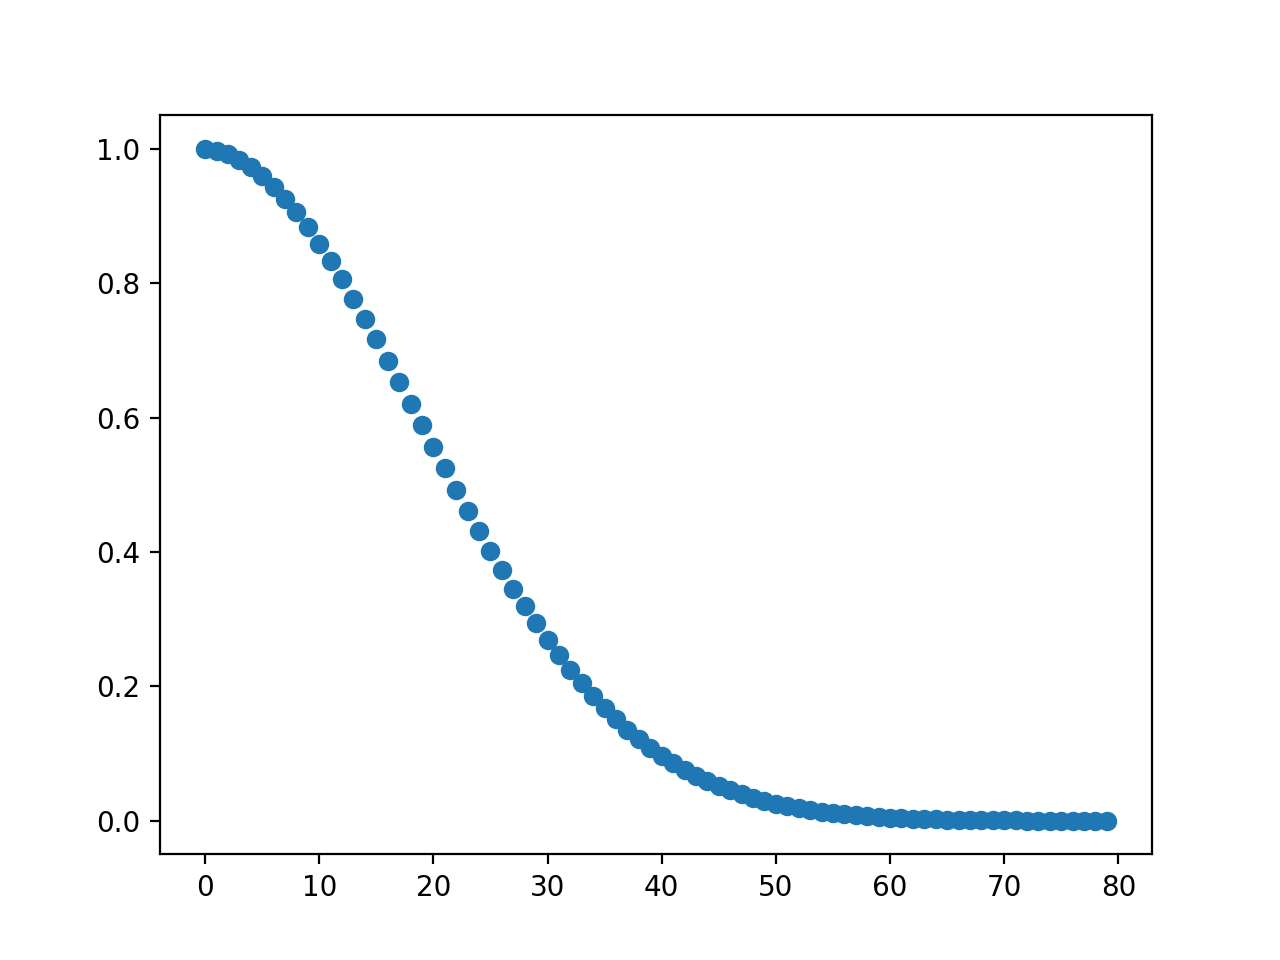

In [3]:
n = np.arange(0,80,1)
P = np.zeros(n.size)

P[0] = 1

for i in n[1:]:
    P[i] = P[i-1]*(365-i)/(365)

plt.scatter(n,P)


**9.** Se lanzan simultáneamente 4 monedas. Imagine que las monedas están truncadas de tal manera que la probabilidad de que la moneda 1 sea cara es $p_1$y que sea sello es $1 - p_1$. Usando el árbol de probabilidad, ¿cuál es la expresión de la probabilidad de obtener dos caras y dos sellos de este evento? Si el truncamineto de las monedas 1 y 2 puede variar como: $0.1 < p_1 < 0.9$ y $0.1 < p_2 < 0.5$, use el árbol de probabilidad para graficar la superficie de probabilidad del evento $A$. ¿En qué punto la probabilidad es mínima y máxima, y cuáles son sus valores?

Para hacer más sencillo los cálculos se codificará las caras como 1 y los sellos como 0. Para el evento $A$ se tienen las siguientes combinaciones
\begin{gather*}
1100\\
1010\\
1001\\
0110\\
0101\\
0011
\end{gather*}

Calculando se tiene que para el primer evento 
$$\mathbb{P}(A_1) = \frac{1}{4}p_1p_2$$
para el segundo 
$$\mathbb{P}(A_2) = \frac{1}{4}p_1(1-p_2)$$
para el tercero
$$\mathbb{P}(A_3) = \frac{1}{4}p_1(1-p_2)$$
para el cuarto
$$\mathbb{P}(A_4) = \frac{1}{4}(1-p_1)p_2$$
para el quinto 
$$\mathbb{P}(A_4) = \frac{1}{4}(1-p_1)p_2$$
para el sexto
$$\mathbb{P}(A_6) = \frac{1}{4}(1-p_1)(1-p_2)$$
Sumando las probabilidades 
$$\mathbb{P}(A) = \frac{1}{4}p_1p_2 + \frac{1}{2}p_1(1-p_2) +\frac{1}{2}(1-p_1)p_2 + \frac{1}{4}(1-p_1)(1-p_2)$$

<IPython.core.display.Javascript object>


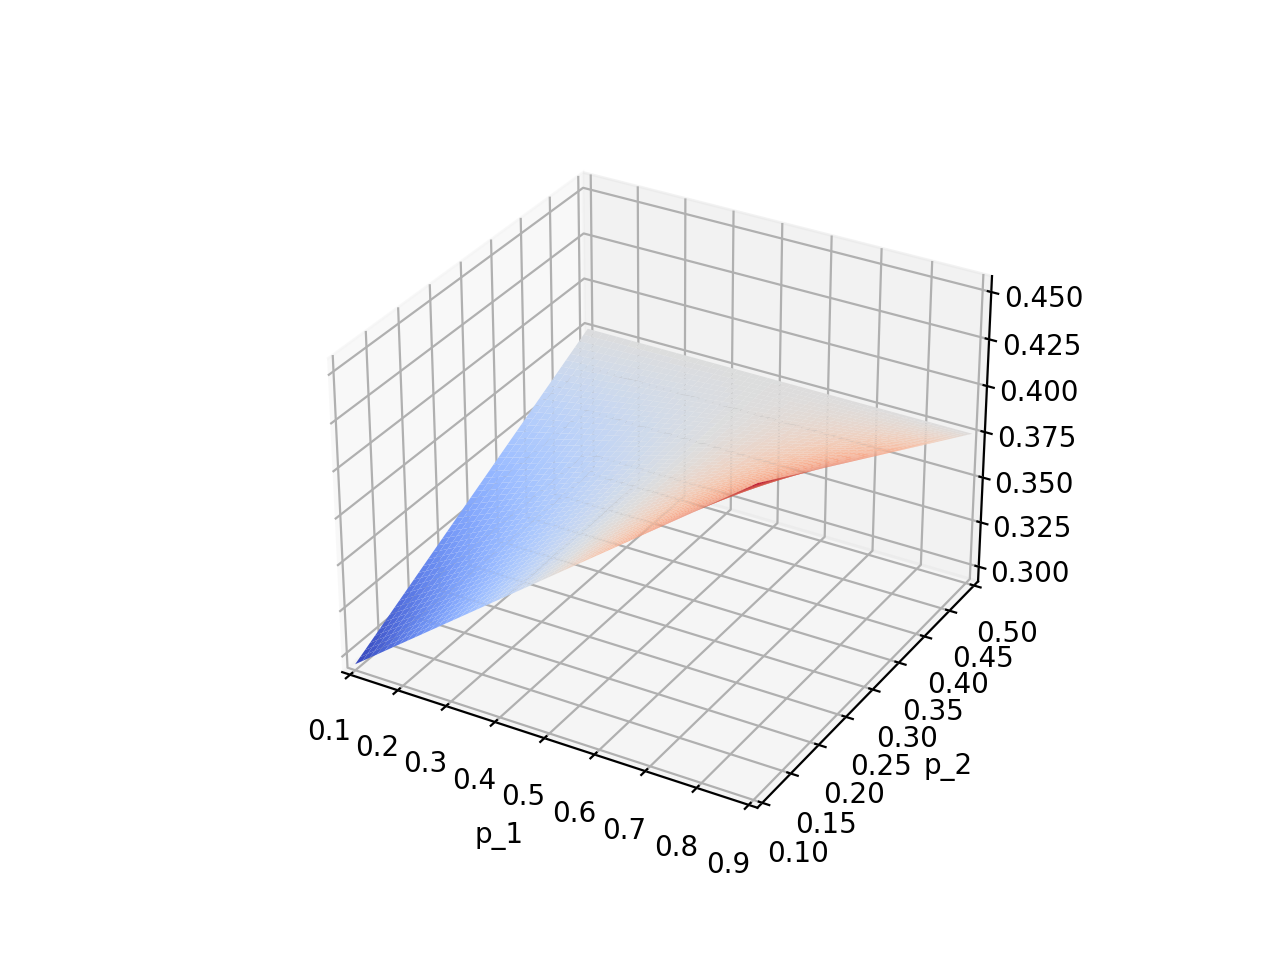

El maxímo es 0.45500000000000007 y el mínimo es 0.29500000000000004


In [4]:
#La probabilidad estará dada por

def Prob(p_1,p_2):
    P = 0.25*p_1*p_2 +0.5*p_1*(1-p_2) +0.5*(1-p_1)*p_2 +0.25*(1-p_1)*(1-p_2)
    return P

p_1 = np.linspace(0.1,0.9,1000)
p_2 = np.linspace(0.1,0.5,1000)

X,Y = np.meshgrid(p_1,p_2)
Prob_ = np.vectorize(Prob)
Prob_ = Prob_(X,Y)

fig,ax = plt.subplots(subplot_kw={"projection":"3d"})

surf = ax.plot_surface(X,Y,Prob_,cmap = cm.coolwarm)
ax.set_xlabel("p_1")
ax.set_xlim(0.1,0.9)
ax.set_ylabel("p_2")
ax.set_ylim(0.1,0.5)

matrix = np.matrix(Prob_)
max_prob = np.max(matrix)
min_prob = np.min(matrix)
print("El maxímo es %s y el mínimo es %s"%(max_prob,min_prob))

Teniendo en cuenta la función $\mathbb{P}(p_1,p_2) = \frac{1}{4}p_1p_2 + \frac{1}{2}p_1(1-p_2) +\frac{1}{2}(1-p_1)p_2 + \frac{1}{4}(1-p_1)(1-p_2)$, se tiene que en los bordes:
$$P(0.1,0.1) = 0.295, P(0.9,0.1)=0.455, P(0.9,0.5) = 0.375,P(0.1,0.5) = 0.375$$
dentro del intervalo $[0.1,0.9]\times[0.1,0.5]$ no hay puntos críticos, por lo que los puntos de máximo y mínimo son, respectivamente, $(0.9,0.5)$ con 0.455 y $(0.1,0.1)$ con 0.295.

**12.** Hay un sistema constituido por $N$ partículas, cada una pued estar en dos niveles de energía distitntos (no degenerados) de valore $\epsilon_0$ y $\epsilon_1$ ($\epsilon_1 < \epsilon_0$).Si se llama $n_0$ al número de partículas en el estado $\epsilon_0$ y a $n_1$ al número de partículas en el estado $\epsilon_1$. Se tienen las siguientes restricciones para la energía total y el número total de partículas:
\begin{gather*}
E = n_0\epsilon_0 + n_1\epsilon_1 \\
N = n_0 + n_1
\end{gather*}

**(a)** Mostrar que el número de configuraciones posibles está dado por
$$\Omega(N,n_0) = \frac{N!}{n_0!n_1!}$$


**Solución:**

Dado que se necesita el número de configuraciones de $N$ partículas. Por ejemplo, un posible microestado puede ser $\{-1,1,-1,1\}$ o $\{1,-1,1,-1\}$ que son diferentes dado que son diferentes partículas con un estado diferente, esto corresponde a una permutación. Por lo que se toma el número total de partículas dividido por por el factorial del número de partículas en el estado $-1$ y el estado $1$ así:
$$\Omega(N,n_0) = \frac{N!}{n_0!(N-n_0)!} = \frac{N!}{n_0!n_1!}.$$

**(b)** Usando la ecuación de la entropía $S(N,n_0) = k_B\ln(\Omega)$ y la fórmula de Stirling $\ln(N!) \approx N\ln(N) - N$, muestre que la entropía es igual a:
$$S(N,n_0,n_1) = k_B\left(N\ln(N)-\sum_{i\in\{ 0,1\}}n_i\ln(n_i)\right)$$

**Solución:**

Se tiene que 
\begin{align*}
S(\Omega,n_0,n_1) &= k_B \ln(\Omega) & \\
&= k_B \left(\ln(N!) - \ln(n_0!n_1!)\right)  & \\
&=  k_B \left(N\ln(N)- N - \ln(n_0!) -\ln(n_1!)\right) & \\
&= k_B \left(N\ln(N)- N - (n_0\ln(n_0)- n_0 + n_1\ln(n_1)-n_1)\right) & \\
&= k_B \left(N\ln(N)- N - n_0\ln(n_0) + n_0 - n_1\ln(n_1)+n_1\right) & \\
&= k_B \left(N\ln(N) - n_0\ln(n_0) - n_1\ln(n_1))\right) = k_B \left(N\ln(N) - \sum_{i\in \{ 0,1\}} n_i\ln(n_i)\right) \\
\end{align*}

Como se quería. $\blacksquare$

**(c)** Si definimos la fracción $x = \frac{n_1}{N}$ de partículas que se encuentran en el nivel de energía $\epsilon_1$. Muestre que la entropía toma la forma:
$$S(N,x) = -k_BN(x\ln x + (1-x)\ln(1-x)).$$

**Solución:** 

Se tiene que 
\begin{align*}
S(N,n_0,n_1) &= k_B(N\ln N - (N - Nx)\ln(N-Nx) - xN\ln(Nx) ) &\\
&= k_BN(\ln N - (1-x)(\ln N + \ln(1-x)) - x(\ln N + \ln x)) & \\
&= k_BN(\ln N - \ln N - \ln(1-x) +x\ln N - x\ln (1-x) - x\ln N - x\ln x) &\\
&=k_BN(x\ln(1-x) -\ln(1-x)-x\ln(1-x)) & \\
&= -k_BN(x\ln x + (1-x)\ln (1-x)).
\end{align*}
Como se quería. $\blacksquare$

**(d)** Dibuje la entropía $S(N,x)/k_BN$ como función de $x$.

/var/folders/4t/ct0jt8v95gn2_thfxlbmx8340000gn/T/ipykernel_7731/1981421952.py:2: RuntimeWarning: divide by zero encountered in log
  S = -(x*np.log(x) + (1-x)*np.log(1-x))
/var/folders/4t/ct0jt8v95gn2_thfxlbmx8340000gn/T/ipykernel_7731/1981421952.py:2: RuntimeWarning: invalid value encountered in multiply
  S = -(x*np.log(x) + (1-x)*np.log(1-x))


<IPython.core.display.Javascript object>


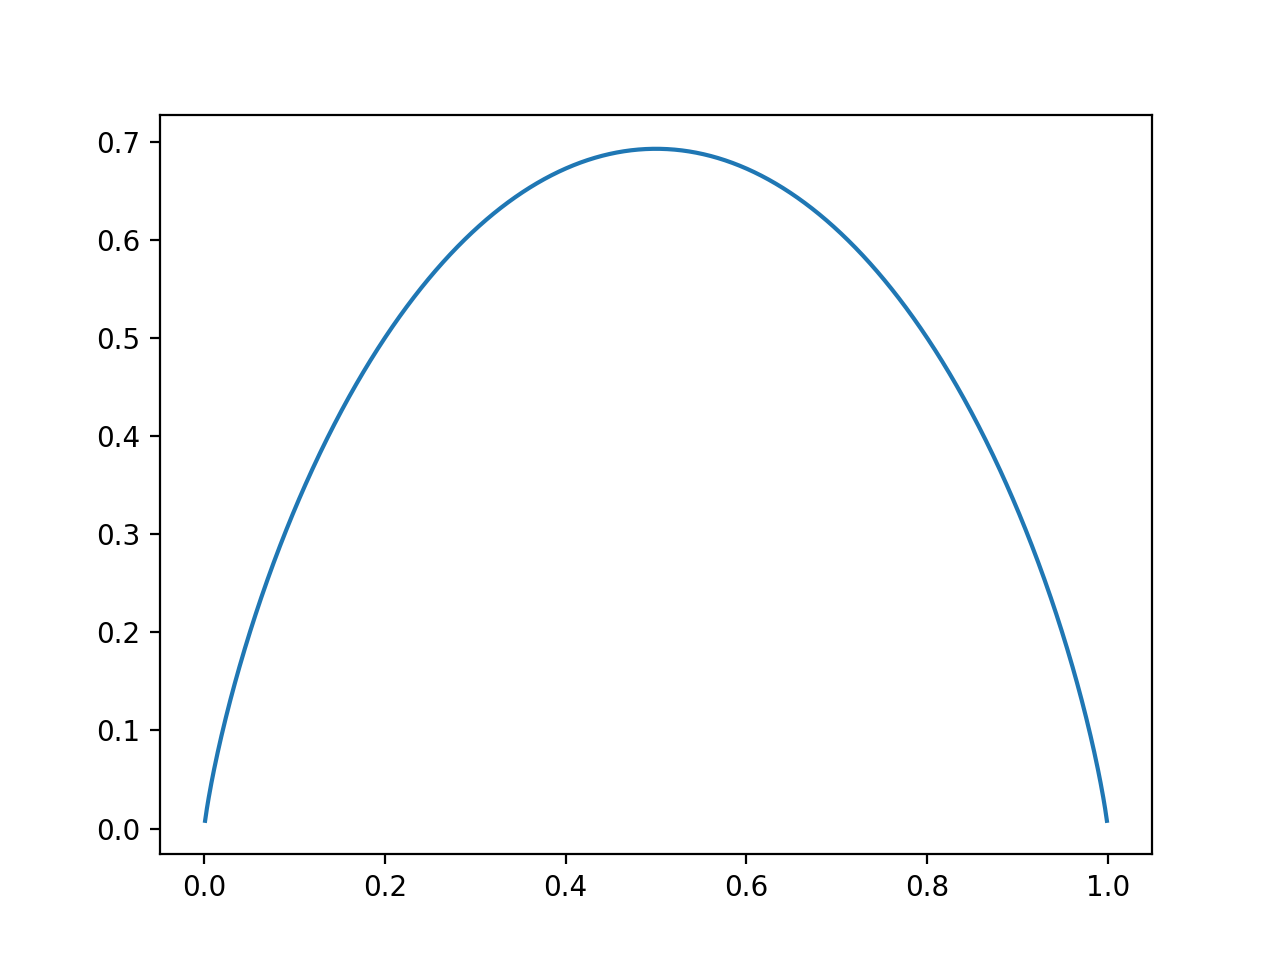

In [6]:
def S_normalized(x):
    S = -(x*np.log(x) + (1-x)*np.log(1-x))
    return S

x =np.linspace(0,1,1000)

S = S_normalized(x)

plt.plot(x,S)

**(e)** De la primera ley de la termodinámica se tiene:
$$\frac{1}{T} = \left(\frac{\partial S}{\partial x}\right)_N\left(\frac{\partial x}{\partial E}\right)_N$$ muestre que la proporción de partículas como función de la temperatura destá dada por:

$$x(T) = \frac{1}{1 + e^{-\Delta E/k_BT}}$$

**Solución:**

Tómense, entonces
\begin{align*}
\frac{\partial S}{\partial x} &= \partial_x \left( -k_BN \left[ x\ln x + (1-x)\ln(1-x)\right]\right)\\
&= -k_BN\left( 1 + \ln x - 1 - \ln(1-x)\right) \\
&= -k_BN\ln\left(\frac{x}{1-x}\right)
\end{align*}
y 
\begin{align*}
\frac{\partial x}{\partial E} &= \partial_E\left(\frac{1}{N(\epsilon_1 - \epsilon_0)}(E - N\epsilon_0)\right) \\
&= \frac{1}{N(\epsilon_1 - \epsilon_0)}
\end{align*}

Esto es 
\begin{align*}
\frac{\partial S}{\partial E} &= \left(\frac{\partial S}{\partial x}\right) \left(\frac{\partial x}{\partial E}\right) \\
&= -k_BN\ln\left(\frac{x}{1-x}\right) \frac{1}{N(\epsilon_1 - \epsilon_0)} \\
&= \frac{k_B}{\epsilon_1 - \epsilon_0}\ln\left(\frac{1-x}{x}\right)  = \frac{1}{T}
\end{align*}

Resolviendo para $x$:
\begin{gather*}
\frac{1}{T} = \frac{k_B}{\epsilon_1 - \epsilon_0}\ln\left(\frac{1-x}{x}\right) \\
\frac{\Delta E}{k_B T} = \ln\left(\frac{1-x}{x}\right)\\
e^{\frac{\Delta E}{k_B T}} =  \frac{1}{x} -1 \\
1 + e^{\frac{\Delta E}{k_B T}} = \frac{1}{x} \\
\frac{1}{1 + e^{\frac{\Delta E}{k_B T}}} = x
\end{gather*}

**(f)** Para bajas y altas temperaturas $T \to 0$ y $T \to \infty$ encuentrar $x(T)$. Muestre que la entropía a altas temperaturas vale:
$$\lim_{T\to \infty } S(T) = k_BN\ln(2).$$

**Solución:**

Se tiene que para cuando $T \to 0$ es 
$$x(T\to 0) = 1 $$ y cuando $T\to \infty$ $$x(T\to \infty) = \frac{1}{2}$$

Se tiene, entonces que 
$S(T \to \infty) = -k_BN(\frac{1}{2}\ln \left( \frac{1}{2}\right) + (1-\frac{1}{2})\ln (1-\frac{1}{2}))$
simplificando: 
\begin{gather*}
-k_BN\left(\frac{1}{2}\ln \left( \frac{1}{2}\right) + \left(1-\frac{1}{2}\right)\ln \left(1-\frac{1}{2}\right)\right) =
k_BN\left(\frac{1}{2}\ln 2 + \frac{1}{2}\ln 2\right)  \\
= k_BN\ln2
\end{gather*}
Como se quería. $\blacksquare$

**(g)** Un gas ideal conformado por $N$ partículas, realiza una expansión isotérmica de un volumen $V_1 = V$ a un volumen $V_2 = 2V$. Calcule el cambio de entropía y compare con el resultado anterior. ¿Cómo se relacionan? 

**Solución:**

Teniendo en cuenta la fórmula para el cambio de entropía
$$\Delta S = k_BN\ln\left(\frac{V_2}{V_1}\right)$$ por lo que entonces
$\Delta S = k_BN\ln 2 $. Este resultado es igual al resultado obtenido al hacer el límite de entropía al infinito, esto significa que la expansión de un gas, de manera isotérmica, es equivalente a aumentar la temperatura del gas hasta infinito.

# Distribuciones discretas de probabilidad

# Distribuciones continuas de probabilidades

1.

a) Verifique que sea una función de densidad conjunta válida.

In [7]:
x= sym.Symbol("x", real = True)
y= sym.Symbol("y", real = True)
f = (2/3)*(x+2*y)

integral = sym.integrate(sym.integrate(f, (x, 0, 1)), (y, 0, 1))
print("Dado que la doble integral de la funcion es igual a", round(integral),  "entre los limites 0 < x < 1 y 0< y < 1; entonces se sabe que la función de densidad conjunta es válida. ")

Dado que la doble integral de la funcion es igual a 1 entre los limites 0 < x < 1 y 0< y < 1; entonces se sabe que la función de densidad conjunta es válida. 


b) Hallar las distribuciones marginales g(x) y h(y).

In [15]:
g=sym.integrate(f,(y,0,1))
h=sym.integrate(f,(x,0,1))
print("Distribución marginal g(x) dada con respecto a la integral con los límites de integración en y es : ")
print("g(x):",  g)
print()
print("Distribución marginal h(y) dada con respecto a la integral con los límites de integración en x es : ")
print("h(y):", h)

Distribución marginal g(x) dada con respecto a la integral con los límites de integración en y es : 
g(x): 0.666666666666667*x + 0.666666666666667

Distribución marginal h(y) dada con respecto a la integral con los límites de integración en x es : 
h(y): 1.33333333333333*y + 0.333333333333333


c) E(x) = 10/18

In [21]:
E_x = sym.integrate(x*g,(x,0,1))
print("El valor esperado para x es:", E_x)

El valor esperado para x es: 0.555555555555556


d) E(y)=11/18

In [22]:
E_y = sym.integrate(y*h,(y,0,1))
print("El valor esperado para y es:", E_y)

El valor esperado para y es: 0.611111111111111


e) Calcular la covarianza usando: σxy = E(xy) − E(x)E(y) = −0.00617

In [27]:
E_xy = sym.integrate(sym.integrate(f*x*y, (x, 0, 1)), (y, 0, 1))
covarianza =  - E_x*E_y + E_xy

print("La covarianza para el ejercico es de:", covarianza )

La covarianza para el ejercico es de: -0.00617283950617281


 f) Calcular la covarianza usando: σxy = E((x − μˆx)(y − μˆy)) = −0.00617

In [30]:
Covarianza = sym.integrate(sym.integrate((x-E_x)*(y-E_y)*f, (x, 0, 1)), (y, 0, 1))
print("Dado la otra formula de covarianza, obtenemos el mismo resultado para esta: ", Covarianza)

Dado la otra formula de covarianza, obtenemos el mismo resultado para esta:  -0.00617283950617284


g) Son las variables x e y independientes?

In [34]:
print("Para saber si las variables son independientes se debe tener la siguiente relación;F_xy= F_x * F_y, para cualquier pareja 𝑥, 𝑦 ∈ 𝑅 𝑥, 𝑦 ")
print("Enconces nosotros tenemos la siguiente igualdad:")
print(f, "=", g*h)
print("En el cual, se evidencia que no son igjales en todo el rango de las parejas, por lo cual, no son independientes. ")

Para saber si las variables son independientes se debe tener la siguiente relación;F_xy= F_x * F_y, para cualquier pareja 𝑥, 𝑦 ∈ 𝑅 𝑥, 𝑦 
Enconces nosotros tenemos la siguiente igualdad:
0.666666666666667*x + 1.33333333333333*y = (0.666666666666667*x + 0.666666666666667)*(1.33333333333333*y + 0.333333333333333)
En el cual, se evidencia que no son igjales en todo el rango de las parejas, por lo cual, no son independientes. 


4. Encontrar el valor esperado dado una función de densidad f y otra función g que se quiere calcular el valor esperado.

In [56]:
f = e**(-x)
g = e**(2*x/3)
integral = sym.integrate(g*f,(x,0,np.inf))
print("El valor esperado de la variable aleatoria es: ", integral)

El valor esperado de la variable aleatoria es:  3.00000000000000


# Metropolis Hasting

1.


a.



In [60]:
n = 10
r = 7





3. 

<IPython.core.display.Javascript object>


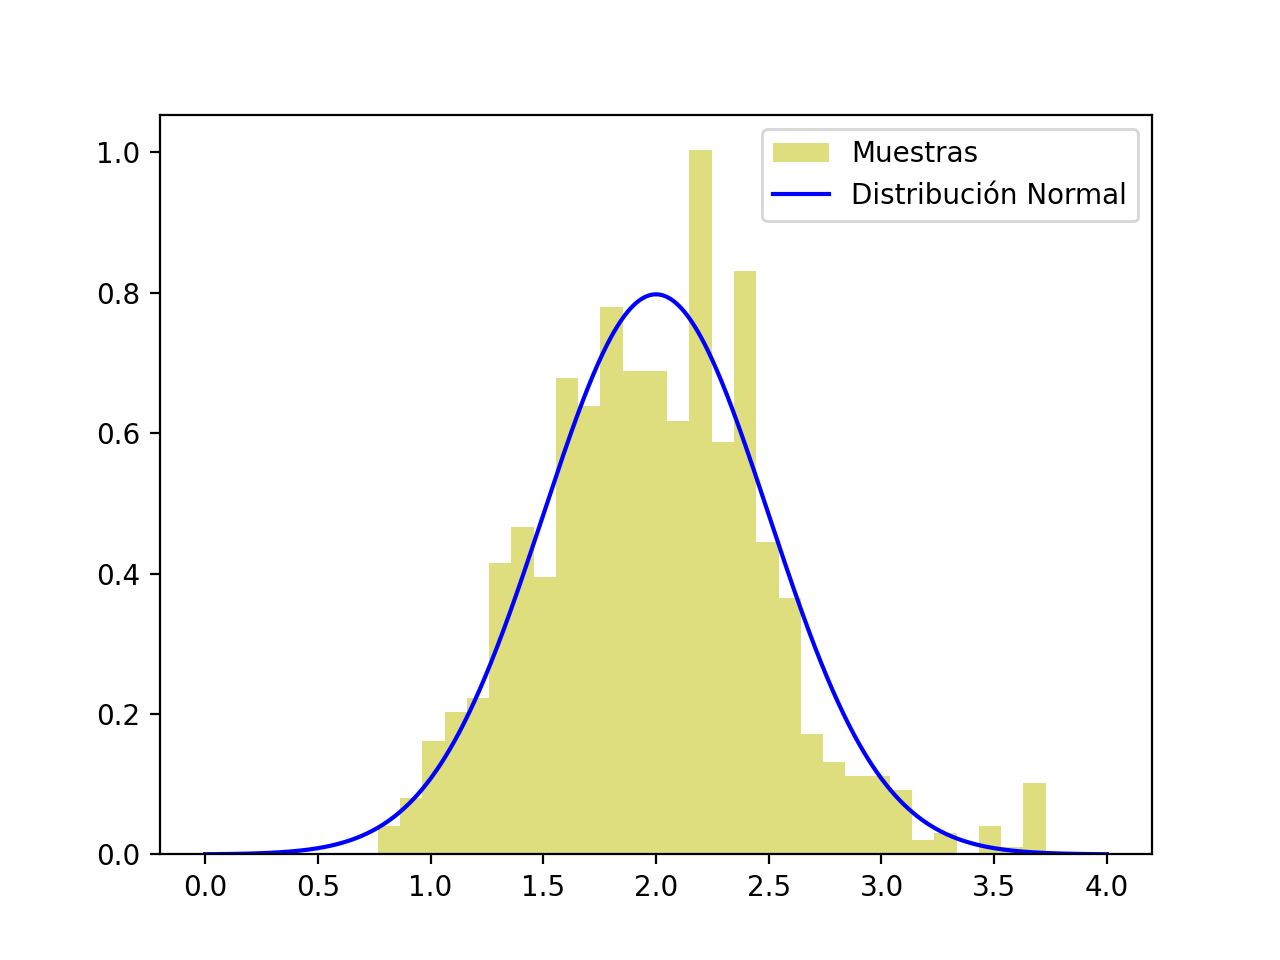

In [58]:
from scipy.stats import norm

n=1000
miu = 2
desvest = 0.5
array = []
x = np.random.normal(miu, desvest)



for every in range(n):
    a = x + np.random.normal(0, step)
    
    f_a = (1/(desvest*np.sqrt(2*np.pi)))*(np.exp((-(a-miu)**2)/desvest))
    f_x = (1/(desvest*np.sqrt(2*np.pi)))*(np.exp((-(x-miu)**2)/desvest))
   
    radio_aceptance = min(1, f_a / f_x)
        
    if np.random.rand() < radio_aceptance:
        x = a
    
    array.append(x)
    

fig, ax = plt.subplots()
plt.hist(array, bins=30, density=True, alpha=0.5, label='Muestras',color='y')
idealx= np.linspace(0, 4, 1000)
idealy = norm.pdf(idealx, miu, desvest)
ax.plot(idealx, idealy, label='Distribución Normal',color='b')
ax.legend()
plt.show()


4.

<IPython.core.display.Javascript object>


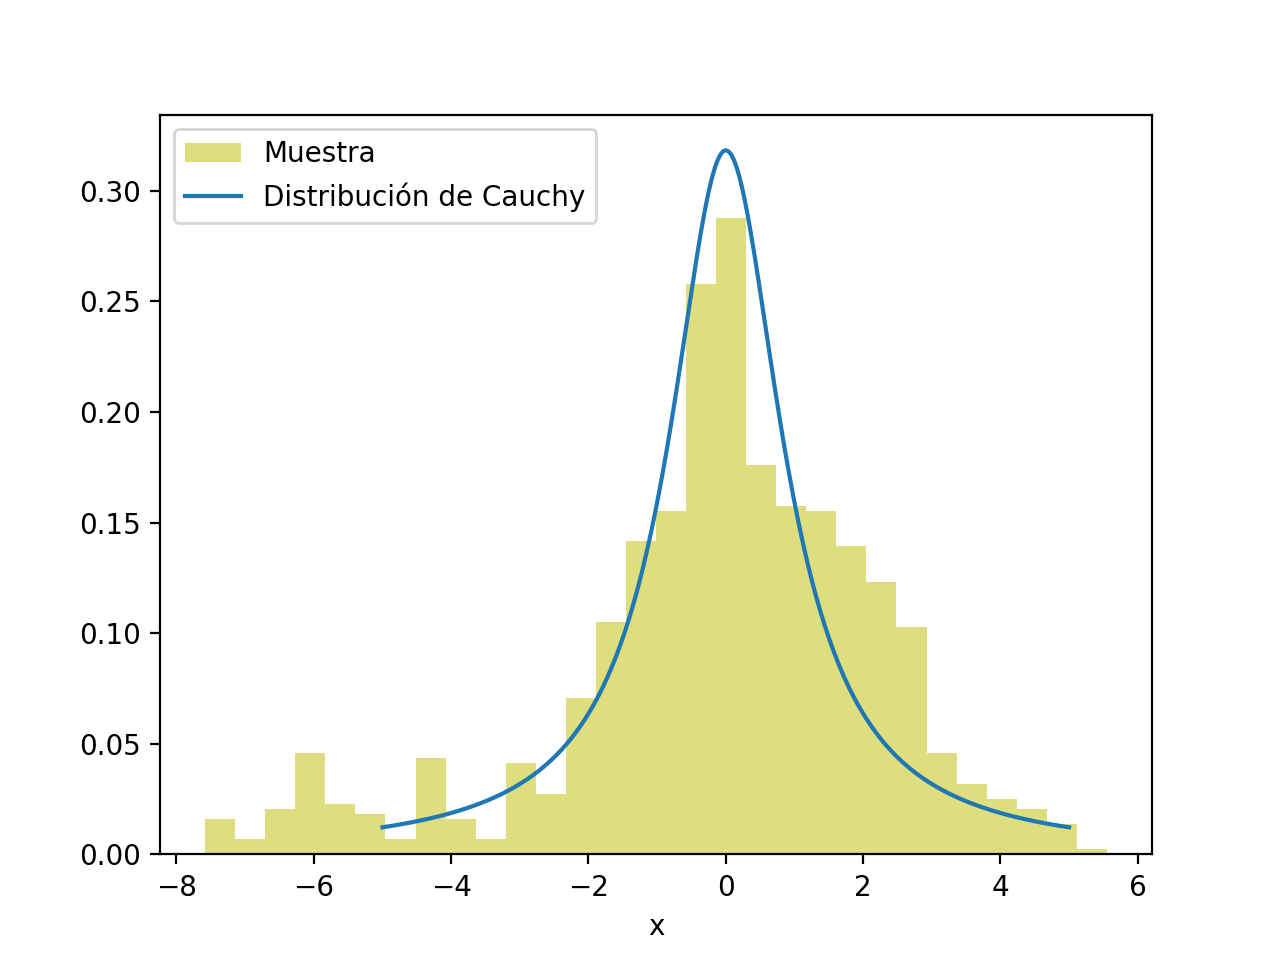

In [59]:
from scipy.stats import cauchy

n = 1000
x= 0

variable = 1
step = 0.4
array = []


def distribucion_cauchy(x):
    denominador = np.pi*(1+x**2)
    return 1/denominador

for every in range(n):
    a = x + np.random.normal(0, step)
    f_a = 1/(np.pi*(1+a**2))
    f_x = 1/(np.pi*(1+x**2))
    radio_aceptacion = min(1, f_a / f_x)
        
    if np.random.rand() < radio_aceptacion:
        x = a
    
    array.append(x)
    
    
x = np.linspace(-5, 5, 100000)
y = cauchy.pdf(x, 0, variable)

fig, ax = plt.subplots()
ax.hist(array, bins=30, density=True, alpha=0.5, label='Muestra', color = "y")
ax.plot(x, y, label='Distribución de Cauchy')
ax.set_xlabel('x')

ax.legend()
plt.show()


    
    

# Parameter Estimation

3.

a)

In [63]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
data = pd.read_csv(url)
x = data['x'].values

b) Utilice la siguiente distribución a priori uniforme:

In [64]:
def priori_uniforme(miu, desvest):
    valor = 0
    if (3 <= miu <=5):
        if (0.5 <= desvest <= 3.5):
            valor = 1
    return valor

c) Escriba la función de Likelihood Gaussiana.

In [69]:
def likelihood_gaussiana(miu,desvest,x):
    valor = 1
    for every in range(len(x)):
        valor*= (np.sqrt(2 * np.pi * desvest**2))**(-1)*(e**(-(miu-x[every])**2/(2*desvest**2)))
    return valor   

d) Calcule el logaritmo de la distribución posterior

In [83]:
def log_distrb(miu, desvest, x):
    log = np.log(priori_uniforme(miu, desvest)*likelihood_gaussiana(miu,desvest,x))
    return log

e) Use el algoritmo de Metrópolis para realizar el muestreo de ln(P(μ,σ/x)) con N =
2×104 eventos.

In [96]:


def algoritmo_metropolis(x):
    N = 2*10**4
    miu_ = np.random.uniform(3, 5)
    desvest_ = np.random.uniform(0.5, 3.5)
    log_distrb_ = log_distrb(miu_, desvest_, x)
    
    miu_valores = [miu_]
    desvest_valores = [desvest_]
    
    for every in range(N):
        miu__ = np.random.normal(miu_, 0.1)
        desvest__ = np.random.normal(desvest_, 0.1)
        log_new = log_distrb( miu__, desvest__,x)
        
        if log_new > log_distrb_:
            miu_ = miu__
            desvest_ = desvest__
            log_distrb_ = log_new
            
        else:
            aceptado = np.exp(log_new - log_distrb_)
            
            if np.random.uniform() < aceptado:
                miu_ = miu__
                desvest_ = desvest__
                log_distrb_ = log_new
                
        miu_valores.append(miu_)
        desvest_valores.append(desvest_)
    
    return miu_valores, desvest_valores

f) Estime el mejor valor de los parámetros del modelo (μˆ,σˆ).

In [115]:
miu_selected, desvest_selected = algoritmo_metropolis(x)

mediana_miu=np.percentile(miu_selected,50)
mediana_desvest=np.percentile(desvest_selected,50)

print("La mediana de miu es:", mediana_miu )
print("La mediana de sigma es:", mediana_desvest )


La mediana de miu es: 4.010263514104945
La mediana de sigma es: 1.8326352862743713


 g) Encuentre los errores σ−+ de los para ́metros en un intervalo de confianza del CL = 68%.

In [125]:
miu_low=np.percentile(miu_selected,16)
miu_up=np.percentile(miu_selected,84)
desvest_low=np.percentile(desvest_selected,16)
desvest_up=np.percentile(desvest_selected,84)


print("Los valores sigma+- de mu en un intervalo de confianza del CL = 68% son: ", mediana_miu - miu_low , "y", miu_up - mediana_miu  )
print("Los valores sigma+- de sigma en un intervalo de confianza del CL = 68% son: ", mediana_desvest - desvest_low , "y", -mediana_desvest + desvest_up)


Los valores sigma+- de mu en un intervalo de confianza del CL = 68% son:  0.18064464686037907 y 0.18913267171833859
Los valores sigma+- de sigma en un intervalo de confianza del CL = 68% son:  0.12214797470081051 y 0.13648988870819778


5. 

B. 


In [64]:
n = 20  
t = 2  
N = 1000000

def Metodo_MonteCarlo(n,t, N):
    array = []
    for every in range(N):
        array.append(np.mean(np.random.exponential(t,n)))
     
    
    varianza = np.var(array)
    return varianza
print("El resultado obtenido es: ")
print(Metodo_MonteCarlo(n,t, N))
print("En el cual, es semejante al propuesto por N = 10^16; var= 0.199 ")

El resultado obtenido es: 
0.1997362583992061
En el cual, es semejante al propuesto por N = 10^16; var= 0.199 
